# ENPH 213 - Week 5 Lab

In this lab, we will be working on solving non-linear equations using a variety of methods while continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab5, where LastName is your last name.  Submit that file to onQ.  Please be aware of a second notebook for Part 6.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Parts 5 and 6 will be marked together (Weighted out of 5).

In [1]:
#Importing modules
import math as m
import numpy as np
import cmath as cm
from matplotlib import pyplot as plt
%matplotlib inline

## Part 1

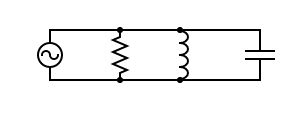

The impedance (Z) of a parallel RLC circuit, such as the one shown, can be represented as

$\Large \frac{1}{Z} = \sqrt{\frac{1}{R^2} + (\omega C - \frac{1}{\omega L})^2 }$

where R is the resistance, $C$ is the capacitance, and $L$ is the inductance.  Of note, the capacitance and inductance contribute a frequency ($\omega$) dependent contribution to $Z$.

Create a function $MyBisect(f, xa, xb)$ that can determine which frequency $\omega$ will give an impedance of $100~\Omega$ and uses the Bisection Method.  Use the following values for $R = 200~\Omega$, $L = 0.4$ H, and $C = 3 \times 10^{-6}$ F.  Determine $\omega$ to within a range of 0.00001, and justify your choice of $xa$ and $xb$.  Print the determined value for $\omega$ and the number of iterations it took to acheive it.

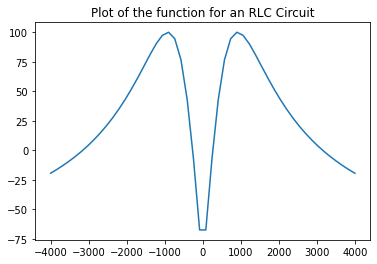


Took  22 iterations to get within 1e-05 of the root
The root of f(x) between 200 and 400 is:  264.44945335388184

Took  22 iterations to get within 1e-05 of the root
The root of f(x) between -200 and -400 is:  -264.44945335388184

Took  17 iterations to get within 1e-05 of the root
The root of f(x) between -3200 and -3000 is:  -3151.2008666992188

Took  17 iterations to get within 1e-05 of the root
The root of f(x) between 3200 and 3000 is:  3151.2008666992188

Took  22 iterations to get within 1e-05 of the root

Took  17 iterations to get within 1e-05 of the root

 However you cannot have negative roots for 1/Z therefore only 264.44945335388184 and  3151.2008666992188 are roots


In [2]:
R = 200 #Ohms
L = 0.4 #H
C = 3*10**-6 #F
error = 0.00001 #get within error of number
Z = 100 #Ohms
value = 264.449

def f(x):
    R = 200 #Ohms
    L = 0.4 #H
    C = 3*10**-6 #F
    Z = 100 #Ohms
    y = (1/R**2+(x*C-1/(x*L))**2)**-0.5-Z
    return y


# Bisection Method taking xa and xb with the function
def MyBisect(f,xa,xb):
    xm = (xa+xb)/2 # define xm
    i = 1  # use to find the iterations
    #print(xm)
    while(abs(f(xm))>error): #loop until condition false
        
        xm = (xa+xb)/2 # redefine xm every loop
        #print(xm)
        
        if(f(xm)*f(xa)<0): # conditionals for bistection mehtod
            xb = np.copy(xm)
            #print(xm)
            
        if(f(xm)*f(xb)<0):
            xa = np.copy(xm)
            #print(xm)
            
        i = i+1 #increment
    print("\nTook ",i-1,"iterations to get within",error,"of the root")
    return xm

n = np.linspace(-4000, 4000)                       # setting an array of points from -4000 to 4000
plt.plot(n, f(n))                             # plotting the function to get a sense for where the roots are located
plt.title("Plot of the function for an RLC Circuit")
plt.show()

    
#I wanted to use an xa and xb somwhat close to the root of the function
#One can see in the graph that there are roots near -3000,-300, 300 and 3000
# the xa and xb values were chosen based on the graph of the function found using wolfram alpha
print("The root of f(x) between 200 and 400 is: ",MyBisect(f,200,400))
print("The root of f(x) between -200 and -400 is: ",MyBisect(f,-200,-400))
print("The root of f(x) between -3200 and -3000 is: ",MyBisect(f,-3000,-3200))
print("The root of f(x) between 3200 and 3000 is: ",MyBisect(f,3000,3200))

print("\n However you cannot have negative roots for 1/Z therefore only",MyBisect(f,200,400),"and ",MyBisect(f,3000,3200),"are roots")

# Part 2

Consider the tank on a water truck, which approximates as a cylinder lying on its side.  The diameter of the tank is 2.3 m and its length is 5.9 m.  For a cylinder lying horizontal, the volume a liquid $V$ will occupy at a height $x$ in the cylinder is

$\Large V = \left[r^2 \cos^{-1}\left( \frac{r-x}{r} \right) - (r-x)\sqrt{2rx-x^2}  \right] L$

where $r$ is the radius of the cylinder and $L$ is its length.  Create a function $MyNewton(f, fderiv, x1)$ that can accept a function and its derivative to determine the height of water in the tank for a specific volume.  In particular, what height of water in the tank is needed for a job requiring 14 m$^3$ of water.  Estimate the error in the height using the relation

$\Large error = \left| \frac{x_{i+1} - x_i}{x_i} \right|$

Determine $x$ to within an error of 0.00001.  Print the determined value for $x$ and the number of iterations it took to acheive it.  Note: $\cos^{-1} = \arccos$

You can validate your code by considering a tank that is half full.

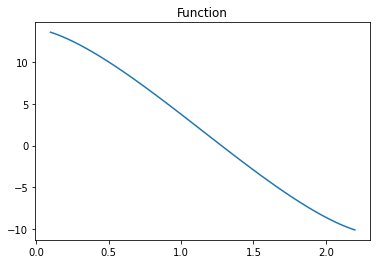

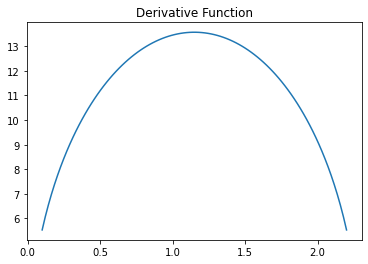


Took  4 iterations to get within 1e-05 of the root
The root of the function is about:  1.2787491250060228


In [3]:
# givens
r = 1.15 #m
V = 14  #m^3
L = 5.9 #m

#fucntion to hold the given equation
def func(V, r, L):
    return lambda x: V-L*(r**2*np.arccos((r-x)/r)-(r-x)*((2*r*x)-x**2)**0.5)

#function to return the derv of the given function
def dervfunc(V,r,L):
    return lambda x: L*(((2*r*x)-x**2)**0.5-((2*r)-2*x)*(r-x)/(2*((2*r*x)-x**2)**0.5) + r/((1-(r-x)**2/r**2)**0.5))


#function for determining the roots
def MyNewton (f,fderiv,x1):
    j = 1
    xcopy = np.copy(x1)
    x1 = f(x1)/fderiv(x1)+x1

    while(abs((x1 - xcopy)/xcopy) > error):
        xcopy = np.copy(x1)                      # Store an x value to compute the error later
        x1 = f(x1)/fderiv(x1)+x1
        j = j+1
        #print(j)
    
    print("\nTook ",j,"iterations to get within",error,"of the root")
    return x1


n = np.linspace(0.1,2.2,100)    # create an array of variables from about 0 to 2

# plot the function to help find where the roots are located
h = func(V,r,L)   # call the function with givens    
plt.plot(n,h(n))
plt.title("Function")
plt.show()

# plot the derivative of the function
dh = dervfunc(V,r,L)    #call the function     
plt.plot(n,dh(n))
plt.title("Derivative Function")
plt.show()

# plotting the functions also insures that the functions were correctly implemented

root = MyNewton(h, dh, 0.5) #call the function with the 
print("The root of the function is about: ", root)


In [4]:
Vtot = (np.pi*r**2)*L
print("The total volume of the cylinder is",Vtot,"and half of that is ",Vtot/2)

newRoot = MyNewton(func(Vtot/2,r,L),dervfunc(Vtot/2,r,L),0.5)
print("The height of the liquid when half full using the Nextwon function is ", newRoot, "\n proving the function works correctly since it is equal to r")



The total volume of the cylinder is 24.513062077797755 and half of that is  12.256531038898878

Took  4 iterations to get within 1e-05 of the root
The height of the liquid when half full using the Nextwon function is  1.15 
 proving the function works correctly since it is equal to r


# Part 3

Create a function $MySecant (f, x1, x2)$ employing the Secant Method to solve the RLC-circuit question from Part 1 and determining the which frequency $\omega$ will give the same impedance of $100~\Omega$.  Determine $\omega$ to within a range of 0.00001 using an error estimate as in Part 2.  Print the determined value for $\omega$ and the number of iterations it took to acheive it.

In [5]:
error = 0.00001

def MySecant(f,x1,x2):
    
    x3 = x2 - f(x2)*(x2-x1)/(f(x2)-f(x1)) #secant equation
    i = 1
    while(abs((x3 - x2)/x2) > error): # loop until the error threshold is met
       
        x3 = x2 - f(x2)*(x2-x1)/(f(x2)-f(x1))
        x2 = np.copy(x1)                          #set x2 to x1
        x1 = np.copy(x3)                          #set x1 to x3
        i = i+1
    print("\nTook ",i-1,"iterations to get within",error,"of the root")

    return x1

root = MySecant(f,10,100)
print("The root of the function was determined to be",root,"using the MySecant Function")


Took  5 iterations to get within 1e-05 of the root
The root of the function was determined to be 264.44945468579135 using the MySecant Function


# Part 4

We can determine how much of your ice cubes are below the surface of your drink.  As will all good physics calculations, we will approximate an ice cube as a sphere.  When placed in the water, gravity will pull the ice cube down with a force $F_g = mg$, where $m$ is the mass of the ice cube $m = \rho V$, where $\rho$ is the density of the ice $\rho_{ice} = 0.917 g/cm^3$ and $V$ is the volume of a sphere $V_{sphere} = \frac{4}{3} \pi r^3$.

As the ice cube sinks in the liquid, Archimedes' Principle states that the upward force is equal to the weight of the fluid displaced by the ice cube.  Of note here, assume that the density of the liquid is that of water, $\rho_{water} = 1.00 g/cm^3$, and the volume of the sphere exposed a height $d$ **above** the surface of the liquid is 

$\large V_{above} = \frac{\pi d^2}{3}(3r-d)$.

Determine the equation to solve, and choose one of the above methods to determine the result.  Assume that the radius of the ice cube is 1.00 cm.

$Q$:  Does you answer seem reasonable?  Instead of an ice cube, consider a ping pong ball with a density of $0.1 g/cm^3$.  Is it what you would expect?

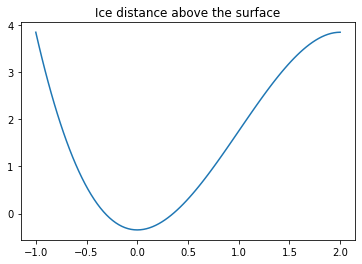

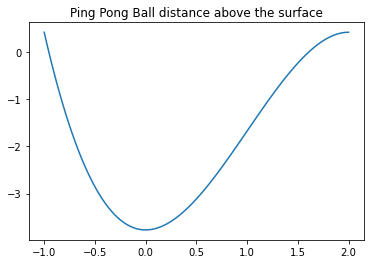


Took  5 iterations to get within 1e-05 of the root
The Ice cube has 0.3542366951541619 above the surface

Took  8 iterations to get within 1e-05 of the root
The pong ball has 1.6083997886851493 above the surface


In [6]:
g = 9.81 #N/kg
pIce = 0.917 #g/cm^
pWater = 1.00 #g/cm^3
pPong = 0.1 #g/cm^3
r = 1.00 #cm



def distance(p,r):
    Vsp = 4/3*np.pi*r**3
    m = p*Vsp
    return lambda d: m+(np.pi*d**2/3)*(3*r-d)-Vsp


Ice = distance(pIce, r)
n = np.linspace(-1,2,100)                # Plot the functions to get a better understanding
plt.plot(n,Ice(n))
plt.title("Ice distance above the surface")
plt.show()

pong = distance(pPong, r)
n = np.linspace(-1,2,100)                # Plot the functions to get a better understanding
plt.plot(n,pong(n))
plt.title("Ping Pong Ball distance above the surface")
plt.show()

rootIce = MySecant(Ice, 0.5, 0.4)
print("The Ice cube has", rootIce,"above the surface")

rootPong = MySecant(pong, 0.5, 0.4)
print("The pong ball has", rootPong,"above the surface")

Q: this matches what one would expect, since the icecub is more dense than a ping pong ball more of the ice cube will lie beneath the water-level compared to the ping pong ball.

# Part 5

In the lecture, we looked at the Kronig-Penny model for the movement of an electron in a crystal.  The analytical solution from Schrodinger's equation is:

$\Large P' \frac{\sin \alpha a}{\alpha a} + \cos \alpha a = \cos k a$

where the energy $E$ is embedded in the $\alpha$ term.  To simplify the calculation of this equation, we will replace all constants with "1", which leaves

$\Large \frac{\sin E}{E} + \cos E = \cos k$

Solve this equations for different values of $k$ from 0 to 3$\pi$, in the ranges $0 \leq k \leq \pi$, $\pi \leq k \leq 2\pi$, $2\pi \leq k \leq 3\pi$, and using at least 50 points per range.  The function will have multiple roots that will oscillate.  Given that we are solving for Energy, there can be only 1 value of $E$ for any value of $k$. So, use the lowest root for the first range of $k$, the second root for the next range of $k$, etc.  Your solutions should replicate the figure in the notes.  One feature you should observe is that as $E$ approaches the end of the range, its slope should go to zero.  When plotting, use 3 different plots, otherwise they will be connected across the gaps.

Ideally, this is performed in a single FOR loop.

In [7]:
def MySecant(f,x1,x2):
    
    x3 = x2 - f(x2)*(x2-x1)/(f(x2)-f(x1)) #secant equation
    i = 1
    while(abs((x3 - x2)/x2) > error): # loop until the error threshold is met
       
        x3 = x2 - f(x2)*(x2-x1)/(f(x2)-f(x1))
        x2 = np.copy(x1)                          #set x2 to x1
        x1 = np.copy(x3)                          #set x1 to x3
        i = i+1
    #print("\nTook ",i-1,"iterations to get within",error,"of the root")

    return x1

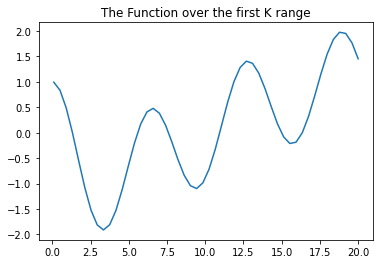

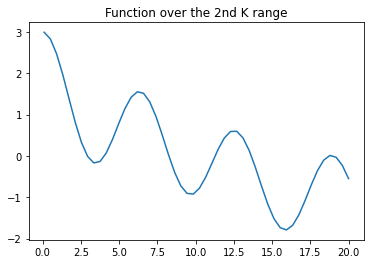

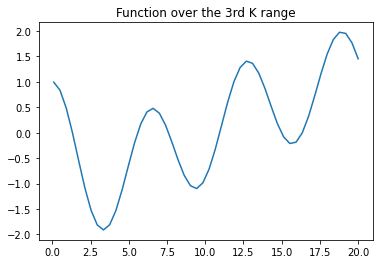


The roots for the equation with a k range from 0 -> pi are:

 [1.30654237 1.30808581 1.31270511 1.32036759 1.33102004 1.34459049
 1.36099047 1.38011767 1.40185871 1.42609205 1.45269063 1.48152444
 1.51246265 1.54537553 1.58013598 1.61662066 1.65471088 1.69429321
 1.73525981 1.77750857 1.82094313 1.86547265 1.91101163 1.95747951
 2.00480027 2.05290193 2.10171605 2.15117708 2.20122171 2.25178813
 2.30281507 2.35424088 2.4060021  2.45803201 2.51025848 2.56260132
 2.6149686  2.66725163 2.71931777 2.77100015 2.82208256 2.87227692
 2.92118929 2.96826896 3.01273317 3.05346446 3.08889452 3.11694662
 3.13521474 3.14159265]

The roots for the equation with a k range from pi -> 2pi are:

 [3.67319441 3.67974945 3.69854953 3.72749039 3.76416894 3.8065127
 3.85295901 3.90239726 3.95405307 4.00738519 4.06201099 4.11765509
 4.17411565 4.23124197 4.28891935 4.34705914 4.40559154 4.46446075
 4.5236215  4.58303656 4.64267481 4.7025099  4.76251921 4.82268297
 4.8829837  4.94340561 5.00393421 5.0645559  

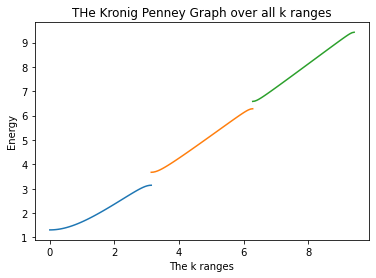

In [8]:
# lambda function in terms of E as given in the question
def func (k):     
    return lambda E: np.sin(E)/E + np.cos(E) - np.cos(k)

#creat the k range arrays to be passed through the function
klow = np.array(np.linspace(0, np.pi, 50))          
kmid = np.array(np.linspace(np.pi, 2*np.pi, 50))
khigh = np.array(np.linspace(2*np.pi, 3*np.pi, 50))

# set up plots for each of the k ranges to understand where the roots will lie
x = np.linspace(0.1,20,50)       
plt.plot(x,func(klow)(x))
plt.title("The Function over the first K range")
plt.show()

plt.plot(x,func(kmid)(x))
plt.title("Function over the 2nd K range")
plt.show()

plt.plot(x,func(khigh)(x))
plt.title("Function over the 3rd K range")
plt.show()



#create arrays to store the roots
array1 = np.zeros(50)  
array2 = np.copy(array1)
array3 = np.copy(array1)


for a in range(0,50):        # loop through the function and solve for all the roots input in the arrays
    array1[a] = MySecant(func(klow[a]), 1, 2)
    array2[a] = MySecant(func(kmid[a]), 4.5, 5.5)
    array3[a] = MySecant(func(khigh[a]), 7.5, 8)

# print the roots for each k range 
print("\nThe roots for the equation with a k range from 0 -> pi are:\n\n", array1)
print("\nThe roots for the equation with a k range from pi -> 2pi are:\n\n", array2)
print("\nThe roots for the equation with a k range from 2pi -> 3pi are:\n\n", array3)


# plotting the kronig penney Graph
plt.plot(klow,array1)
plt.plot(kmid,array2)
plt.plot(khigh,array3)
plt.title("THe Kronig Penney Graph over all k ranges")
plt.xlabel("The k ranges")
plt.ylabel("Energy")

plt.show()



# Part 6

To come later in a separate notebook.

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

All code was written by Nathan Pacey, however topics were discussed Connor Legg and Stuart Gaherty